# Stock analysis using SMA with a period of 21 and 50 days respectively


### This project utilizes a technical analysis tool called Simple Mobile Average (SMA) to analyze buy/sell recommendation following this pattern

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [73]:
datos = pd.read_csv("amd_us_d.csv")
datos.head()

,Date,Open,High,Low,Close,Volume
0,2024-01-02,144.28,144.40,137.4300,138.58,64902029
1,2024-01-03,135.71,137.43,133.7413,135.32,61988583
2,2024-01-04,134.30,137.70,134.0000,136.01,58610286
3,2024-01-05,136.78,141.01,136.4377,138.58,69657676
4,2024-01-08,140.36,147.15,140.1500,146.18,71756913


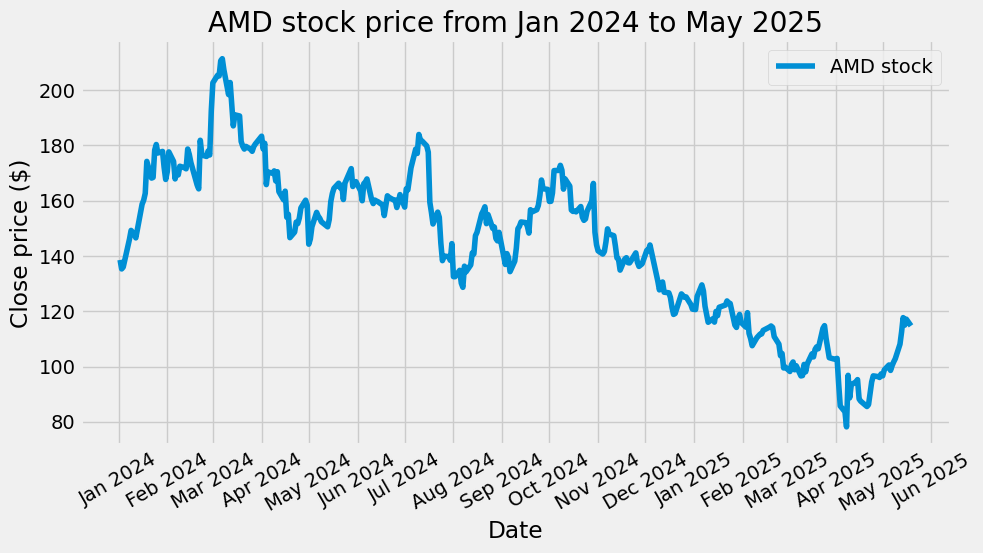

In [75]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

datos['Date'] = pd.to_datetime(datos['Date'])

plt.figure(figsize=(10, 5))
plt.plot(datos['Date'], datos['Close'], label='AMD stock')

ax = plt.gca()

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.title('AMD stock price from Jan 2024 to May 2025')
plt.xlabel('Date')
plt.ylabel('Close price ($)')
plt.setp(ax.get_xticklabels(), rotation=30)

plt.legend()

plt.show()


#### SMA calculated for 21 days

In [78]:
SMA21 = pd.DataFrame() 
SMA21['Close'] = datos['Close'].rolling(window = 21).mean()
SMA21

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
341,96.611667
342,97.717381
343,98.655476
344,100.030714


#### SMA calculated for 50 days

In [81]:
SMA50 = pd.DataFrame() 
SMA50['Close'] = datos['Close'].rolling(window = 50).mean()
SMA50

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
341,98.5829
342,98.9223
343,99.1887
344,99.5551


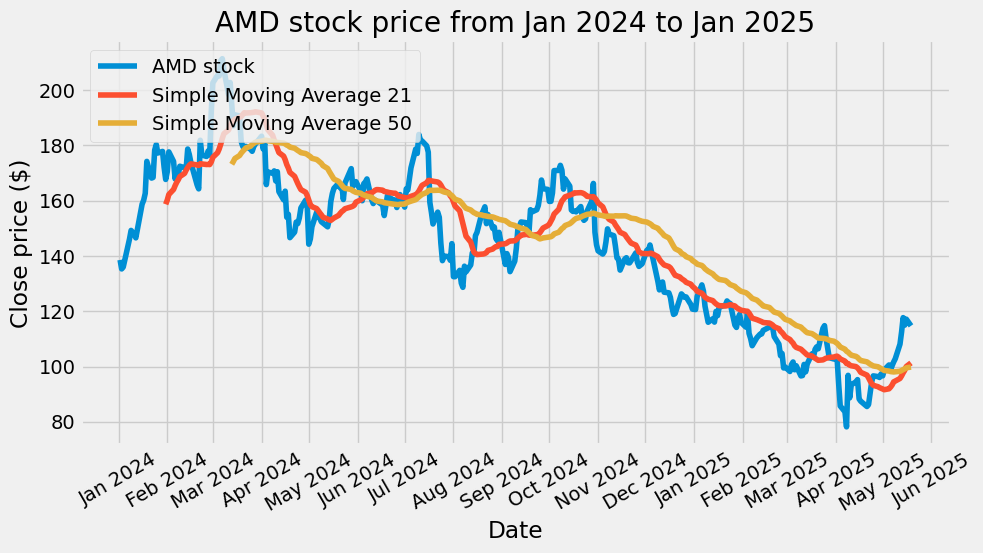

In [83]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(10, 5))

plt.plot(datos['Date'], datos['Close'], label='AMD stock')
plt.plot(datos['Date'], SMA21['Close'], label='Simple Moving Average 21')
plt.plot(datos['Date'], SMA50['Close'], label='Simple Moving Average 50')

plt.title('AMD stock price from Jan 2024 to Jan 2025')
plt.xlabel('Date')
plt.ylabel('Close price ($)')
plt.legend(loc='upper left')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.setp(ax.get_xticklabels(), rotation=30)

plt.show()


In [84]:
data = pd.DataFrame()
data['AMD'] = datos['Close']
data['SMA21'] = SMA21['Close']
data['SMA50'] = SMA50['Close']
data

,AMD,SMA21,SMA50
0,138.58,NaN,NaN
1,135.32,NaN,NaN
2,136.01,NaN,NaN
3,138.58,NaN,NaN
4,146.18,NaN,NaN
...,...,...,...
341,112.46,96.611667,98.5829
342,117.72,97.717381,98.9223
343,114.99,98.655476,99.1887
344,117.17,100.030714,99.5551


In [87]:
def signal(data):
    purchases = []
    sales = []
    condicion = 0

    for dia in range(len(data)):
        
        if data['SMA21'][dia] > data ['SMA50'][dia]:
            if condicion != 1:
                purchases.append(data['AMD'][dia])
                sales.append(np.nan)
                condicion = 1
            else:
                purchases.append(np.nan)
                sales.append(np.nan)
                
        elif data['SMA21'][dia] < data ['SMA50'][dia]:

            if condicion != -1:
                purchases.append(np.nan)
                sales.append(data['AMD'][dia])
                condicion = -1
            else:
                purchases.append(np.nan)
                sales.append(np.nan)

        else:
            purchases.append(np.nan)
            sales.append(np.nan)
            
    return (purchases, sales)

In [89]:
signals = signal(data)
data['Purchases'] = signals[0]
data['Sales'] = signals[1]
data

,AMD,SMA21,SMA50,Purchases,Sales
0,138.58,NaN,NaN,NaN,NaN
1,135.32,NaN,NaN,NaN,NaN
2,136.01,NaN,NaN,NaN,NaN
3,138.58,NaN,NaN,NaN,NaN
4,146.18,NaN,NaN,NaN,NaN
...,...,...,...,...,...
341,112.46,96.611667,98.5829,NaN,NaN
342,117.72,97.717381,98.9223,NaN,NaN
343,114.99,98.655476,99.1887,NaN,NaN
344,117.17,100.030714,99.5551,117.17,NaN


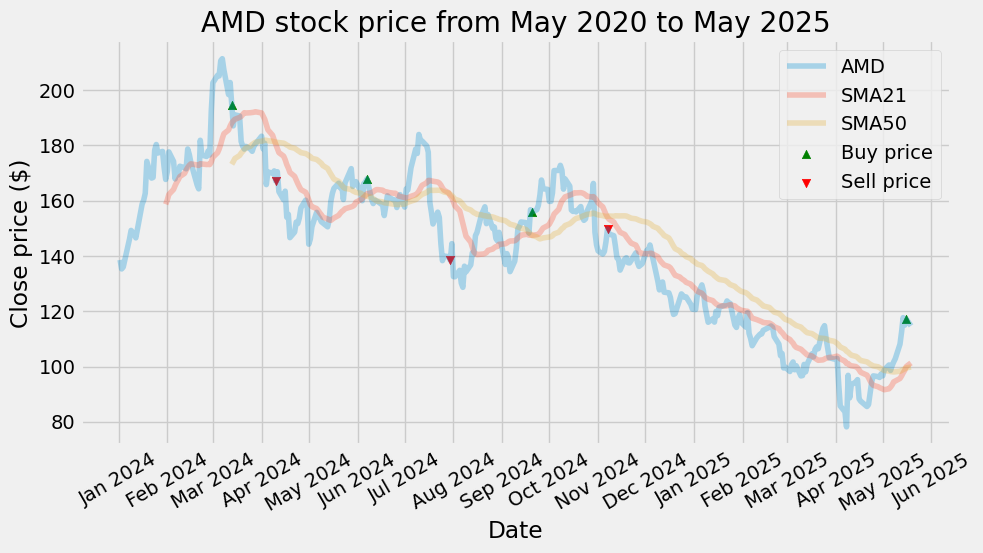

In [91]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(10, 5))

data['Date'] = datos['Date']  
data['Date'] = pd.to_datetime(data['Date'])  
data.set_index('Date', inplace=True)

plt.plot(data['AMD'], label="AMD", alpha=0.3)
plt.plot(data['SMA21'], label="SMA21", alpha=0.3)
plt.plot(data['SMA50'], label="SMA50", alpha=0.3)
plt.scatter(data.index, data['Purchases'], label='Buy price', marker='^', color='green')
plt.scatter(data.index, data['Sales'], label='Sell price', marker='v', color='red')

plt.title('AMD stock price from May 2020 to May 2025')
plt.xlabel('Date')
plt.ylabel('Close price ($)')
plt.legend(loc='upper right')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.setp(ax.get_xticklabels(), rotation=30)

plt.show()
